# <font color=darkcyan>  Introduction to Bayes classification with discriminant analysis</font>

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

### <font color=darkred> Linear discriminant analysis </font>

In [2]:
# set parameters
n = 100
mu1 = np.array([-3, 0])
mu2 = np.array([3, 5])
mu3 = np.array([4, -4])
mu = [mu1, mu2, mu3]
sigma = [1, 1, 1]
rho = [0.5, 0.5, 0.5]
cov = [np.array([[1,r],[r,1]])*s for r,s in zip(rho,sigma)]

<font color=darkred>
    
- For each pair of mean and covariance, sample n Gaussian random variables with the associated mean and covariance.

- Associate each random variable with a label depending on the mean and covariance.
    
</font>

In [3]:
# generate data
x = [ss.multivariate_normal(mean=m, cov=c).rvs(size=n) for m,c in zip(mu,cov)]
X = np.vstack(x)
y = np.hstack([np.ones(n)*0, np.ones(n)*1, np.ones(n)*2]).astype(int)

In [4]:
print(X)

[[-2.1658497  -0.51961038]
 [-2.82911101  0.44630847]
 [-2.47774123 -1.50370615]
 [-4.03440494 -0.3365484 ]
 [-3.72976565  0.0121568 ]
 [-3.63471963 -0.29976386]
 [-4.949481   -1.40036287]
 [-3.29860586  1.64965552]
 [-4.68754166 -1.87789692]
 [-2.24816527 -0.69486928]
 [-2.60783173  0.86664692]
 [-5.05311508 -1.57535341]
 [-0.74281841  1.24159373]
 [-3.41282911  1.32640998]
 [-3.23012252 -1.0606227 ]
 [-4.30465901  0.28061964]
 [-1.98338925  1.85502003]
 [-1.8120646   1.93026062]
 [-4.49471601  0.88624984]
 [-2.43302527  0.25577819]
 [-3.68761752 -0.39242986]
 [-3.09977738 -1.34729284]
 [-1.12398963  1.7174686 ]
 [-3.44492966 -1.17278504]
 [-3.67732091  0.50039159]
 [-2.47380802  0.26857815]
 [-3.92758195 -0.92783765]
 [-3.70045366 -0.88980455]
 [-2.74684808 -0.72848204]
 [-2.15088663 -0.42031692]
 [-3.42071006  1.76004327]
 [-1.49937113  1.55281925]
 [-3.58020215  1.09517862]
 [-2.76480601  0.1244863 ]
 [-1.94870424  0.36304254]
 [-3.78378557 -2.1617524 ]
 [-2.12472121  1.50018082]
 

In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


<font color=darkred>
    
- Run a linear discriminant analysis using ``LinearDiscriminantAnalysis`` from ``sklearn.discriminant_analysis``  
    
</font>

In [6]:
lda = LinearDiscriminantAnalysis(solver='eigen', store_covariance=True)
lda.fit(X,y)

LinearDiscriminantAnalysis(solver='eigen', store_covariance=True)

<font color=darkred>
    
- Compare the LDA estimated parameters with MLE computations.
    
</font>

In [7]:
# Labels distribution
priors = np.array([ (y==i).sum() for i in range(3) ]) / X.shape[0]
print('LDA estimated distribution for the labels')
print(lda.priors_)
print('MLE estimated distribution for the labels')
print(priors)

LDA estimated distribution for the labels
[0.33333333 0.33333333 0.33333333]
MLE estimated distribution for the labels
[0.33333333 0.33333333 0.33333333]


In [8]:
means = [data.mean(axis=0) for data in x]
print('LDA estimated group means')
print(lda.means_)
print('MLE estimated group means')
print(means)

LDA estimated group means
[[-3.03349722 -0.02225458]
 [ 2.93865248  5.09141483]
 [ 3.97001358 -4.06623406]]
MLE estimated group means
[array([-3.03349722, -0.02225458]), array([2.93865248, 5.09141483]), array([ 3.97001358, -4.06623406])]


In [9]:
cov_empiric = [np.cov(data.T, bias=True) for data in x]
cov_weighted = np.array([cov_empiric[i] * lda.priors_[i] for i in range(3)]).sum(axis=0)

print('LDA estimated covariances')
print(lda.covariance_)
print('MLE estimated covariances')
print(cov_weighted)

LDA estimated covariances
[[0.93102617 0.36163113]
 [0.36163113 0.86531577]]
MLE estimated covariances
[[0.93102617 0.36163113]
 [0.36163113 0.86531577]]


<font color=darkred>
    
- Compare the LDA prediction using ``predict`` with the decision_function chosen label.
    
</font>

In [10]:
x_new = np.array([[-1, 1],
                   [1.5, 2],
                   [1, 0],
                   [0.7, 3.2]])

In [12]:
print('LDA predict')
print(lda.predict(x_new))
print('Decision function')
print(np.argmax(lda.decision_function(x_new), axis=1))

LDA predict
[0 1 0 1]
Decision function
[0 1 0 1]


<font color=darkred>
    
- Display the decision boundary with ``DecisionBoundaryDisplay``.
    
</font>

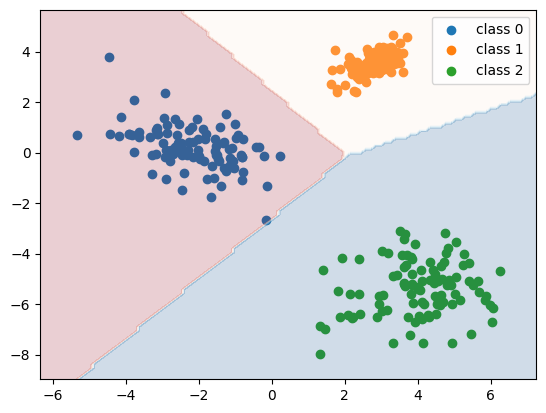

In [25]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure()
for i, xk in enumerate(x):
    plt.scatter(xk[:, 0], xk[:, 1], label=f'Class {i}')

DecisionBoundaryDisplay.from_estimator(
    lda,
    X,
    response_method="predict",
    ax=plt.gca(),
    cmap="RdBu",
    alpha=0.2)
plt.legend()
plt.show()

### <font color=darkred> Quadratic discriminant analysis </font>

In [15]:
# set parameters
n = 100
mu = [np.array([-2, 0]),
      np.array([2.8, 3.5]),
      np.array([4, -5.4])]
sigma = [1, 0.2, 1.3]
rho = [-.5, 0.5, 0.2]
cov = [np.array([[1,r],[r,1]])*s for r,s in zip(rho,sigma)]

<font color=darkred>
    
- For each pair of mean and covariance, sample n Gaussian random variables with the associated mean and covariance.

- Associate each random variable with a label depending on the mean and covariance.
    
</font>

In [16]:
# generate data
x = [ss.multivariate_normal(mean=m, cov=c).rvs(size=n) for m,c in zip(mu,cov)]
X = np.vstack(x)
y = np.hstack([np.ones(n)*0, np.ones(n)*1, np.ones(n)*2]).astype(int)

In [ ]:
# Samples in the first group
print(x[0])

[[-1.89557957 -0.83942289]
 [-3.28182363 -0.23550204]
 [-1.56901866 -1.54054878]
 [-3.50681741 -2.84095417]
 [-1.24463367  0.96015086]
 [-0.93548362  1.22867031]
 [-2.54962072 -0.95053685]
 [-0.19705469  0.97591545]
 [-1.728473   -0.93121365]
 [-1.04633858 -0.63863338]
 [-2.32931387  1.36883572]
 [-1.23454436  0.69176279]
 [-0.78852083  0.26234723]
 [-2.65123479 -1.23076806]
 [-1.85205734 -1.07605488]
 [-1.1275544   0.92062979]
 [-2.25895449  0.30607488]
 [-1.5841942  -1.00699057]
 [-2.65263148 -0.24770421]
 [-1.97548509 -0.19841129]
 [-2.5020632  -0.03647552]
 [-1.94260231  0.19853269]
 [-1.70346816  0.31514178]
 [-1.61023359  0.60803476]
 [-2.93670484 -1.64205202]
 [ 1.13454101  1.62590854]
 [-2.49439326 -1.47713135]
 [-3.59048466 -0.51287405]
 [-1.90308444 -1.17250346]
 [-0.23930918  0.56680941]
 [-1.12461883  0.691415  ]
 [-3.05950463 -0.46044187]
 [-2.18617988 -1.57087591]
 [-2.97739148 -0.94825744]
 [-1.44719095 -0.17001448]
 [-1.89665244  1.226912  ]
 [-2.24258612  0.01114128]
 

<font color=darkred>
    
- Run a quadratic discriminant analysis using ``QuadraticDiscriminantAnalysis`` from ``sklearn.discriminant_analysis``  
    
</font>

In [17]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X,y)

QuadraticDiscriminantAnalysis(store_covariance=True)

<font color=darkred>
    
- Compare the QDA estimated parameters with MLE computations.
    
</font>

In [18]:
means = [data.mean(axis=0) for data in x]
cov_empiric = [np.cov(data.T, bias=True) for data in x]

In [19]:
print('QDA estimated group means')
print(qda.means_)
print('MLE estimated group means')
print(means)

QDA estimated group means
[[-2.15597175  0.20199997]
 [ 2.77044259  3.50378619]
 [ 4.00393194 -5.38655246]]
MLE estimated group means
[array([-2.15597175,  0.20199997]), array([2.77044259, 3.50378619]), array([ 4.00393194, -5.38655246])]


In [20]:
for sigma_qda, x_class in zip(qda.covariance_, x):
    print('QDA estimated covariances')
    print(sigma_qda)
    print('MLE estimated covariances')
    print(np.cov(x_class.T))

QDA estimated covariances
[[ 1.2079236  -0.44459922]
 [-0.44459922  0.75572235]]
MLE estimated covariances
[[ 1.2079236  -0.44459922]
 [-0.44459922  0.75572235]]
QDA estimated covariances
[[0.20724785 0.10710066]
 [0.10710066 0.18817423]]
MLE estimated covariances
[[0.20724785 0.10710066]
 [0.10710066 0.18817423]]
QDA estimated covariances
[[1.30904105 0.18322139]
 [0.18322139 1.13759316]]
MLE estimated covariances
[[1.30904105 0.18322139]
 [0.18322139 1.13759316]]


<font color=darkred>
    
- Display the decision boundary with ``DecisionBoundaryDisplay``.
    
</font>

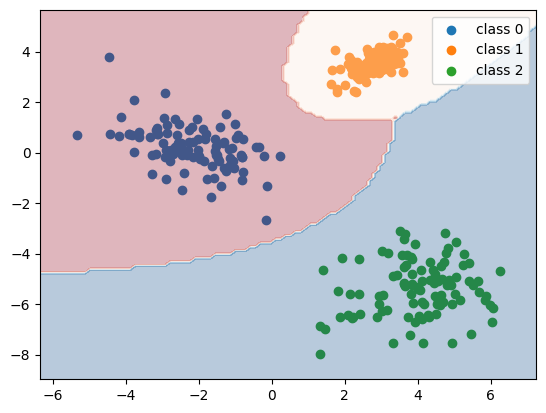

In [26]:
plt.figure()
for i, xk in enumerate(x):
    plt.scatter(xk[:, 0], xk[:, 1], label=f'class {i}')

DecisionBoundaryDisplay.from_estimator(
    qda,
    X,
    response_method="predict",
    ax=plt.gca(),
    cmap="RdBu",
    alpha=0.3)
plt.legend()
plt.show()

### <font color=darkred> Discriminant analysis with real data </font>

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The dataset can be found here https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

In [27]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Select two classes for visualization
X_iris = X_iris[:100, [0, 2]]
y_iris = y_iris[:100]

<font color=darkred>
    
- Compare the empirical means and covariances in each group.
    
</font>

In [28]:
X_1 = X_iris[y_iris == 0]
X_2 = X_iris[y_iris == 1]
mu1 = np.mean(X_1, axis=0)
mu2 = np.mean(X_2, axis=0)

In [36]:
Sigma = np.zeros((2, 2))
for c, mean in [(X_1, mu1), (X_2,mu2)]:
    S = np.zeros((2, 2))
    for sample in c:
        diff = (sample - mean).reshape(2, 1)
        S += np.dot(diff, diff.T)
    Sigma += S

<font color=darkred>
    
- Display the decision boundary of a QDA on this dataset.
    
</font>

In [31]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_iris,y_iris)

QuadraticDiscriminantAnalysis(store_covariance=True)

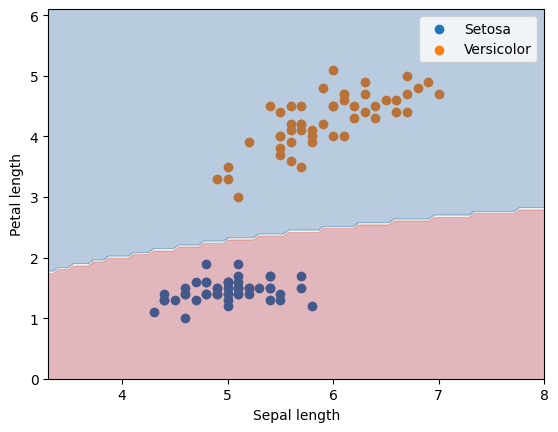

In [34]:
plt.figure()
plt.scatter(X_1[:, 0], X_1[:, 1], label='Setosa')
plt.scatter(X_2[:, 0], X_2[:, 1], label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')

DecisionBoundaryDisplay.from_estimator(
    qda,
    X_iris,
    response_method="predict",
    ax=plt.gca(),
    cmap="RdBu",
    alpha=0.3)
plt.legend()
plt.show()